# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=4 in 5.7 sec
circles, perplexity=6 in 5.5 sec
circles, perplexity=9 in 6 sec
circles, perplexity=14 in 7.3 sec
circles, perplexity=21 in 9.1 sec
circles, perplexity=30 in 12 sec
circles, perplexity=45 in 15 sec
circles, perplexity=100 in 21 sec
circles, perplexity=500 in 17 sec


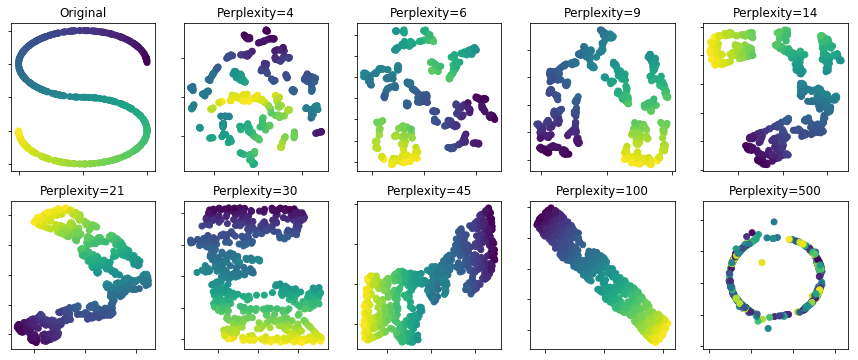

In [7]:
# 設定模型與繪圖參數
n_samples = 500
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 100, 500]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)
# X.shape, color.shape

# 繪製資料原圖 Original
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i < 4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time() 
    
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0)) #cost time
    
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()

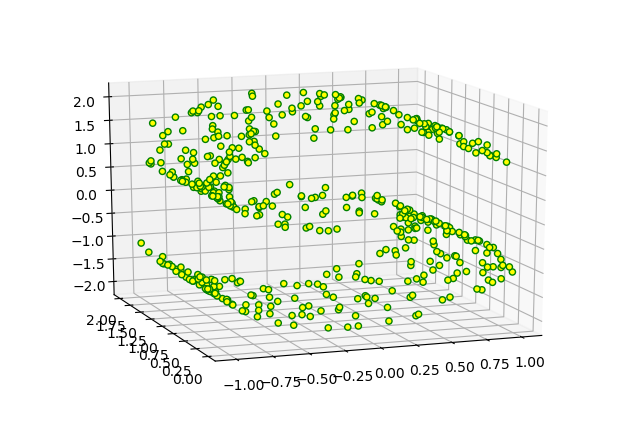

In [8]:
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c='yellow',alpha=1,edgecolor='green')
ax.view_init(azim=250,elev=15)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [ ]:
perplexity數值越低只有很近的鄰居才有影響力,圖會散成好幾堆, 數值越高向心力越強,最後會整個糊在一起

In [ ]:
# https://newtoypia.blogspot.com/2017/07/t-sne.html